In [1]:
# set env variables
import os
import pandas as pd
import numpy as np
import mlflow
from dotenv import find_dotenv, load_dotenv
import shap
import mlflow.sklearn
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier


#Import the credentials to register in MLflow
dotenv_path = find_dotenv()
load_dotenv(dotenv_path)

True

In [1]:
import pycaret
pycaret.__version__

'2.3.10'

In [2]:
data = pd.read_csv("C:/Users/willi/Python/Spotify_Project/Data/final_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      1900 non-null   int64  
 1   genres          1900 non-null   int64  
 2   sub-genres      1900 non-null   int64  
 3   explicit        1900 non-null   int64  
 4   followers       1900 non-null   int64  
 5   danceability    1900 non-null   float64
 6   energy          1900 non-null   float64
 7   key             1900 non-null   int64  
 8   loudness        1900 non-null   float64
 9   mode            1900 non-null   int64  
 10  tempo           1900 non-null   float64
 11  duration_ms     1900 non-null   int64  
 12  time_signature  1900 non-null   int64  
 13  mood            1900 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 207.9 KB


In [4]:
X = data.drop('mood', axis=1)
y = data['mood']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# initialize setup
from pycaret.classification import *
s = setup(data, target = 'mood', session_id = 123, 
          numeric_features = ['popularity', 'followers', 'danceability', 'energy', 'loudness', 'tempo','duration_ms'],
          categorical_features = ['genres', 'sub-genres', 'explicit','key','mode','time_signature'] ,
          experiment_name = 'mood1')

,Description,Value
0,session_id,123
1,Target,mood
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1900, 14)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7216,0.7854,0.7600,0.7260,0.7416,0.4401,0.4422,0.1940
catboost,CatBoost Classifier,0.7179,0.7926,0.7657,0.7199,0.7405,0.4319,0.4351,2.3110
et,Extra Trees Classifier,0.7149,0.7780,0.7643,0.7168,0.7386,0.4257,0.4286,0.2130
gbc,Gradient Boosting Classifier,0.7141,0.7809,0.7814,0.7089,0.7421,0.4229,0.4275,0.3000
lightgbm,Light Gradient Boosting Machine,0.6983,0.7717,0.7343,0.7066,0.7190,0.3933,0.3953,0.3180
xgboost,Extreme Gradient Boosting,0.6870,0.7669,0.7214,0.6968,0.7078,0.3709,0.3727,0.5700
ridge,Ridge Classifier,0.6863,0.0000,0.7486,0.6863,0.7151,0.3674,0.3706,0.0300
ada,Ada Boost Classifier,0.6810,0.7447,0.7300,0.6862,0.7060,0.3578,0.3605,0.1260
lda,Linear Discriminant Analysis,0.6810,0.7323,0.7500,0.6799,0.7123,0.3561,0.3598,0.0930
dt,Decision Tree Classifier,0.6674,0.6662,0.6886,0.6840,0.6853,0.3326,0.3337,0.0300


In [5]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


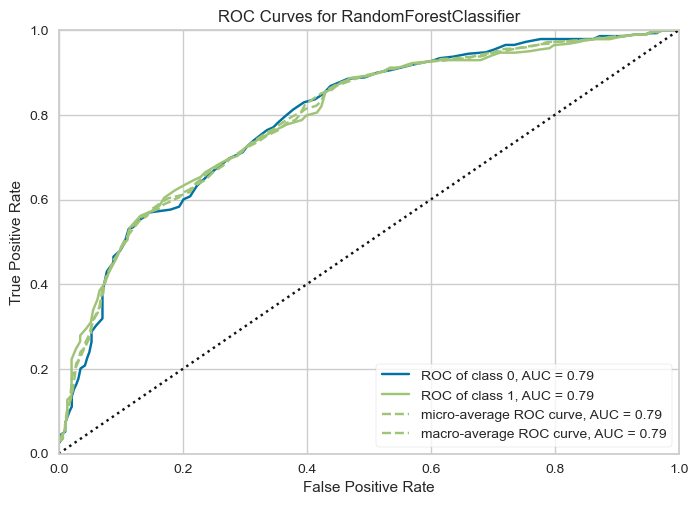

In [6]:
plot_model(best_model, plot = 'auc')

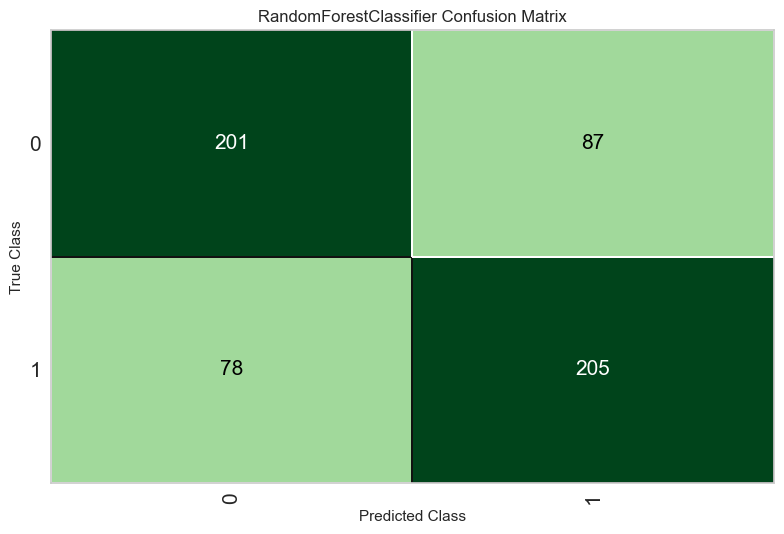

In [7]:
plot_model(best_model, plot = 'confusion_matrix')

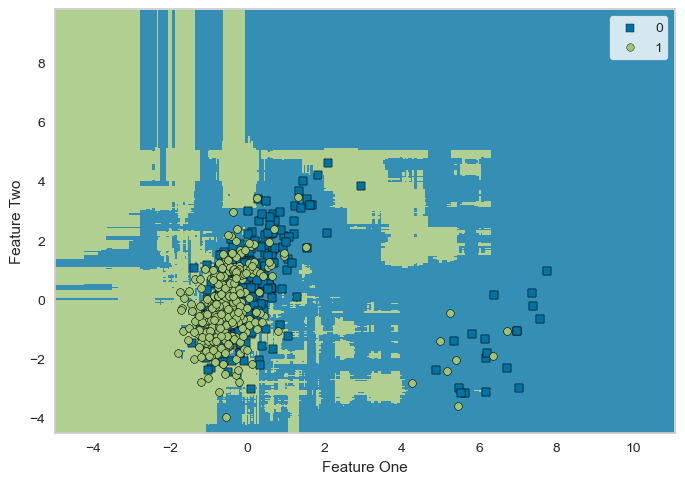

In [8]:
plot_model(best_model, plot = 'boundary')

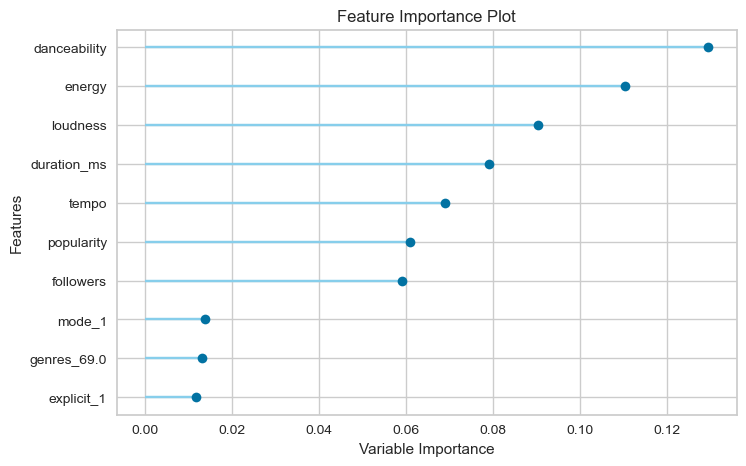

In [9]:
plot_model(best_model, plot = 'feature')

In [ ]:
# save pipeline
save_model(best_model, 'outputs\model')

In [26]:
!pip install scipy==1.10.1

  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl (42.2 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3


ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\willi\\AppData\\Local\\Temp\\pip-uninstall-i7buf00o\\scipy\\cluster\\_hierarchy.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [28]:
import cloudpickle

MLFLOW_TRACKING_URI = os.getenv("MLFLOW_TRACKING_URI")
MLFLOW_TRACKING_USERNAME = os.getenv("MLFLOW_TRACKING_USERNAME")
MLFLOW_TRACKING_PASSWORD = os.getenv("MLFLOW_TRACKING_PASSWORD")

mlflow.set_tracking_uri("https://dagshub.com/inouyewilliam/Master-Thesis.mlflow")

logged_model = 'runs:/5154466b36f54418a25059dcb5a943be/model'
    
loaded_model = mlflow.sklearn.load_model(logged_model)



final_model = loaded_model.best_estimator_['model']
final_model

AttributeError: Can't get attribute 'rv_discrete_frozen' on <module 'scipy.stats._distn_infrastructure' from 'C:\\Users\\willi\\anaconda3\\lib\\site-packages\\scipy\\stats\\_distn_infrastructure.py'>

In [49]:
loaded_model.best_estimator_[2]

RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=84)

In [7]:
model = RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=84)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=84)

In [8]:
explainer = shap.TreeExplainer(model)

explainer

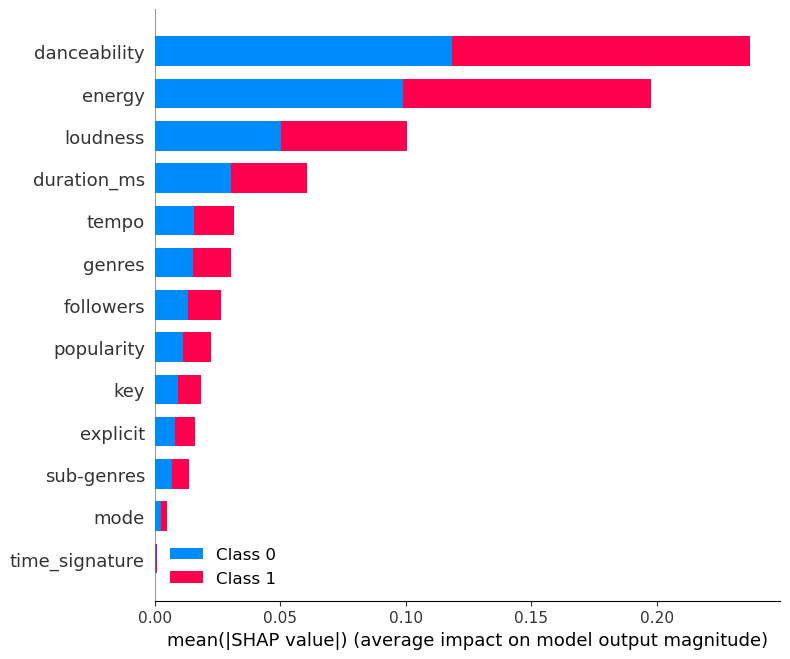

In [9]:
shap.initjs()
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [38]:
shap.force_plot(explainer.expected_value[0], shap_values[0][:1000,:])

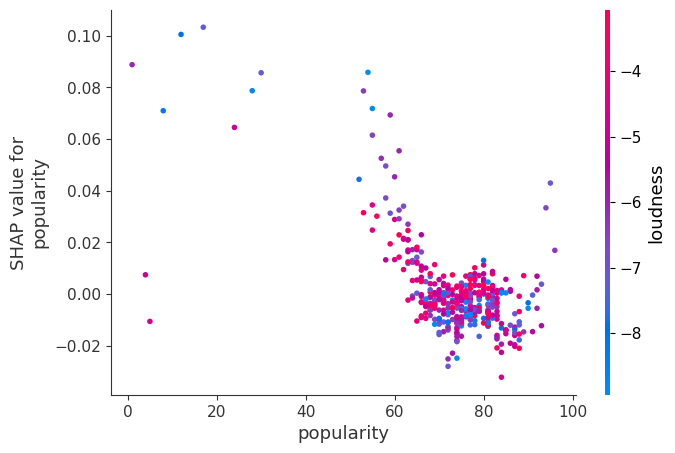

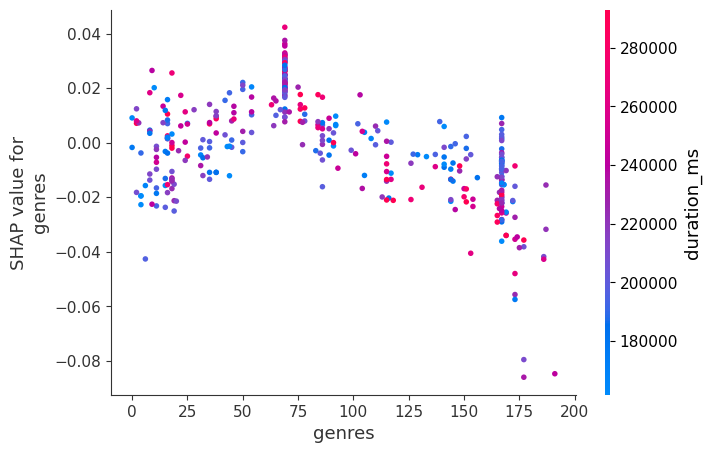

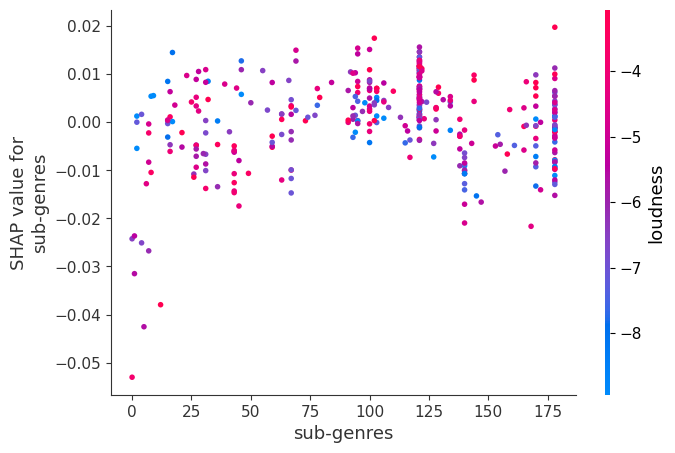

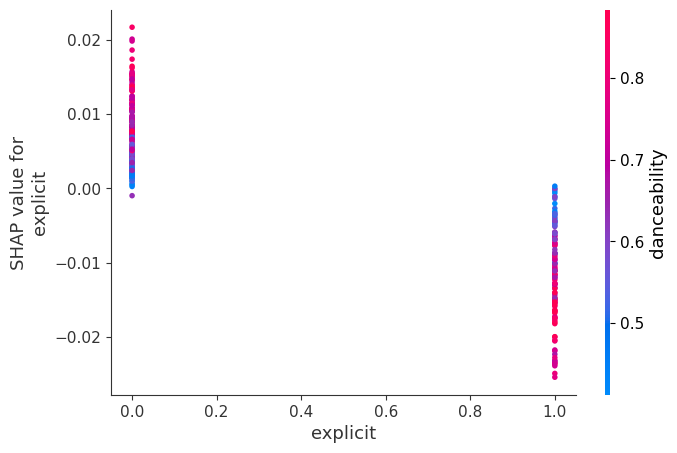

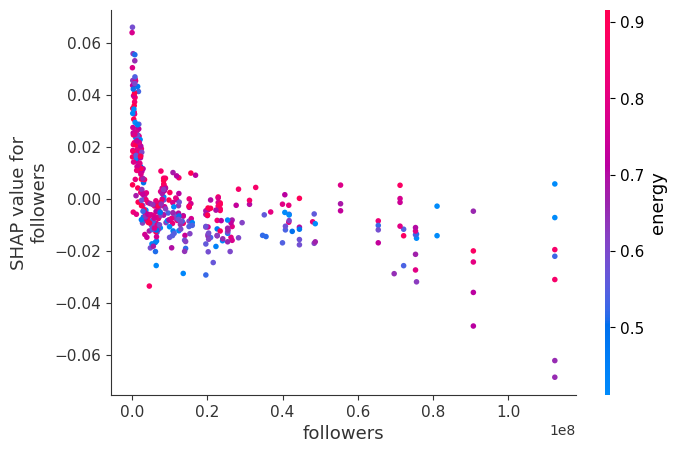

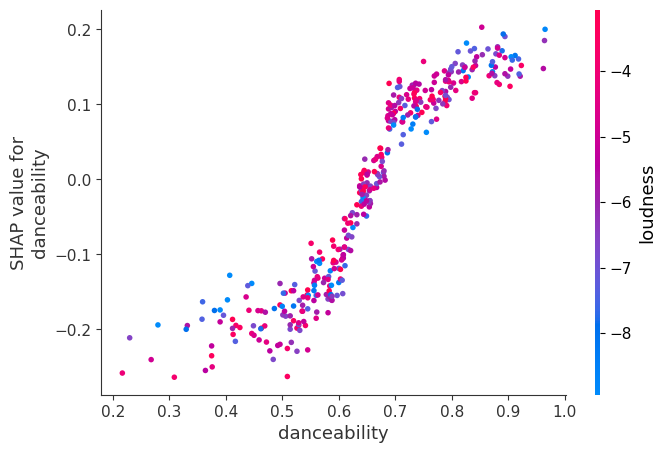

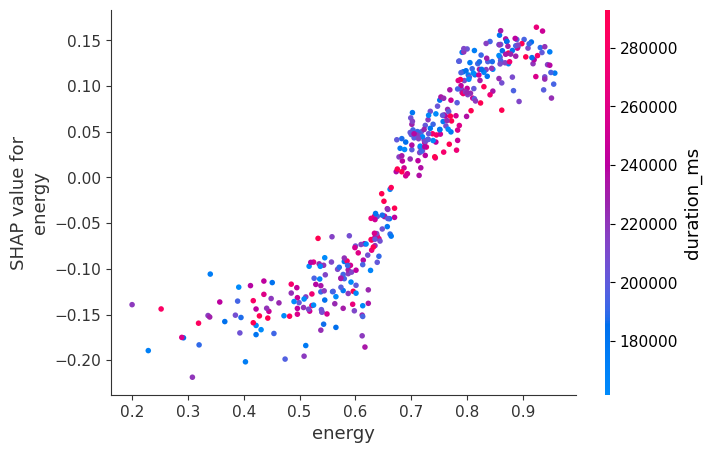

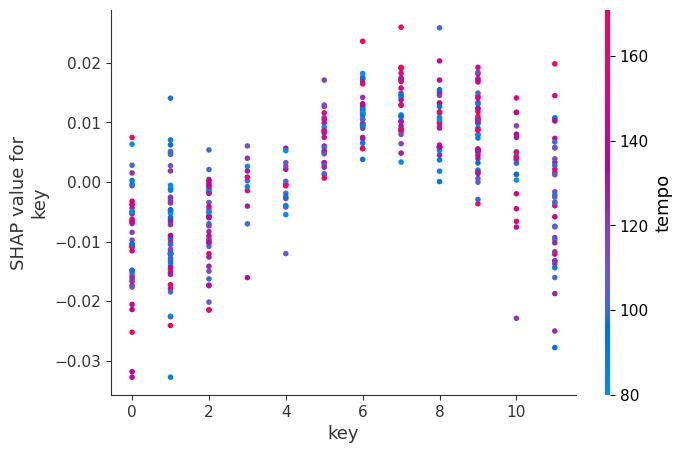

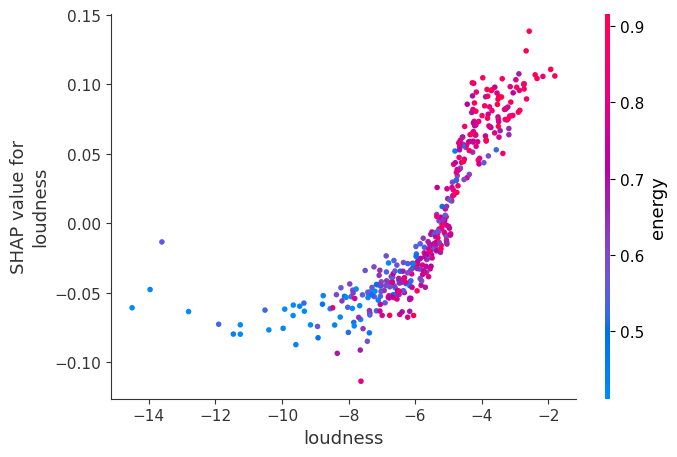

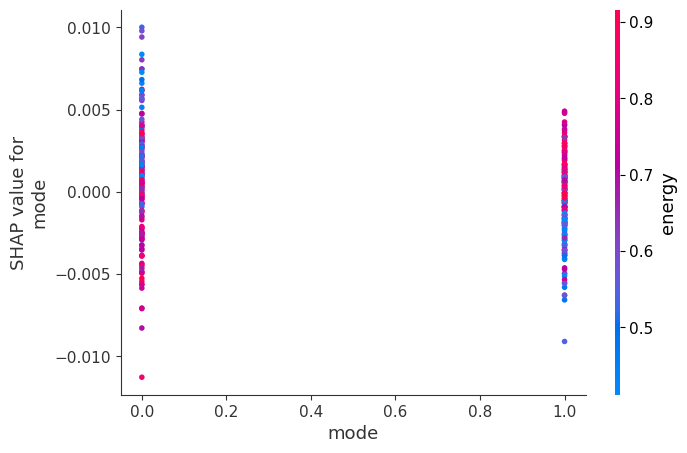

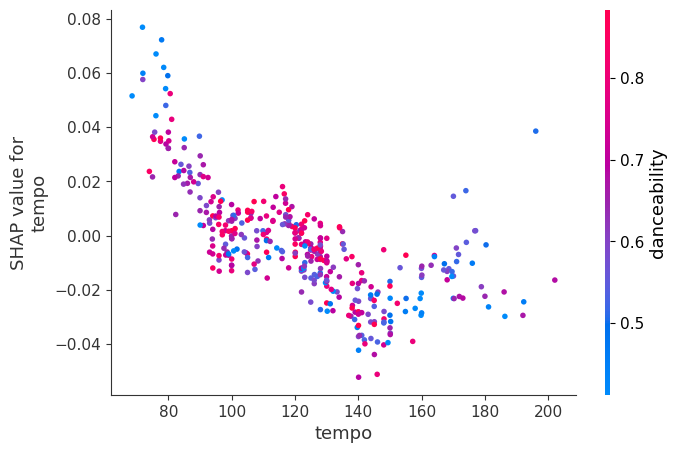

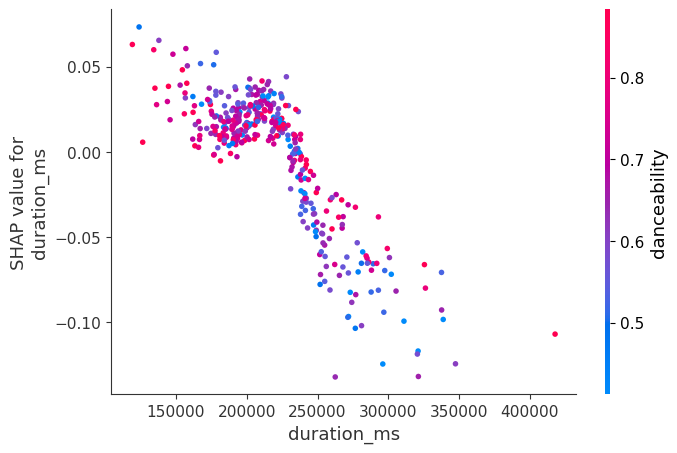

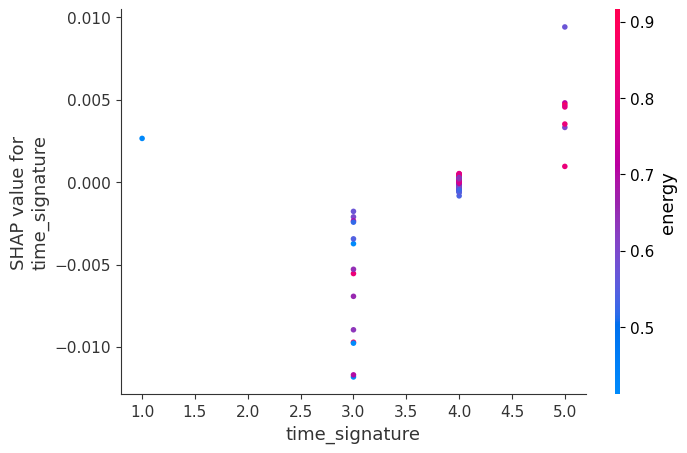

In [36]:
for name in X_test.columns:
    shap.dependence_plot(name, shap_values[1], X_test, display_features=X_test)